In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#load in all 4 files
df_agonist_ddg  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/agonist_low_ddg_all_torsion_data_sorted_clean.csv", usecols=[0, 1, 2], header=None)
# Rename the columns
df_agonist_ddg.columns = ['ligand', 'strain_energy_max', 'strain_energy_min']

# Create a new column for the average strain energy
df_agonist_ddg['strain_energy_average'] = df_agonist_ddg[['strain_energy_max', 'strain_energy_min']].mean(axis=1)

In [3]:
df_agonist_ddg

,ligand,strain_energy_max,strain_energy_min,strain_energy_average
0,00000_compare_7l1u_receptor_only_PV-0004920980...,7.995300,6.894993,7.445147
1,00001_compare_7l1u_receptor_only_PV-0011177493...,5.915002,5.213695,5.564349
2,00002_compare_7l1u_receptor_only_PV-0011177493...,5.915002,5.213695,5.564349
3,00003_compare_7l1u_receptor_only_PV-0011235287...,4.037002,3.683522,3.860262
4,00004_compare_7l1u_receptor_only_PV-0011235287...,4.770390,4.333567,4.551979
...,...,...,...,...
198,00198_compare_7l1u_receptor_only_Z3878403833_1...,5.193157,4.454526,4.823842
199,00199_compare_7l1u_receptor_only_Z3878403833_1...,10.378773,8.997111,9.687942
200,00200_compare_7l1u_receptor_only_Z3878403833_1...,5.665096,4.835297,5.250197
201,00201_compare_7l1u_receptor_only_Z3878403833_1...,6.085968,5.165672,5.625820


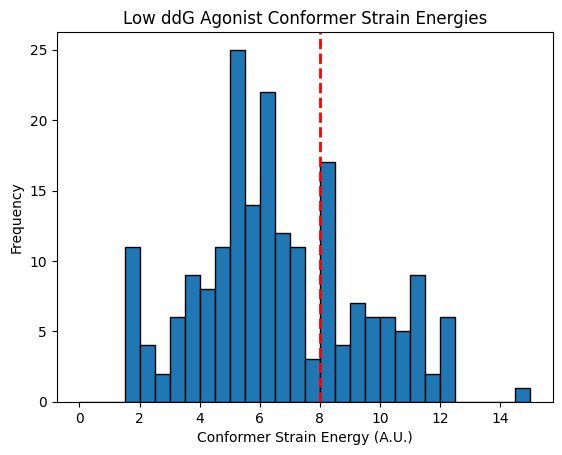

In [4]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_agonist_ddg['strain_energy_average']

bin_edges = np.arange(0, max(counts), 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Low ddG Agonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()

In [5]:
#number of placements with passing strain
len(df_agonist_ddg[df_agonist_ddg['strain_energy_average'] < 8])

138

In [6]:
df_agonist_ddg_low_strain = df_agonist_ddg[df_agonist_ddg['strain_energy_average'] < 8]

In [7]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_agonist_ddg_low_strain['ligand_name'] =  df_agonist_ddg_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_ddg_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 52


/tmp/ipykernel_1803222/1089260509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agonist_ddg_low_strain['ligand_name'] =  df_agonist_ddg_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


In [8]:
df_agonist_ddg_low_strain

,ligand,strain_energy_max,strain_energy_min,strain_energy_average,ligand_name
0,00000_compare_7l1u_receptor_only_PV-0004920980...,7.995300,6.894993,7.445147,PV-000492098021
1,00001_compare_7l1u_receptor_only_PV-0011177493...,5.915002,5.213695,5.564349,PV-001117749312
2,00002_compare_7l1u_receptor_only_PV-0011177493...,5.915002,5.213695,5.564349,PV-001117749312
3,00003_compare_7l1u_receptor_only_PV-0011235287...,4.037002,3.683522,3.860262,PV-001123528796
4,00004_compare_7l1u_receptor_only_PV-0011235287...,4.770390,4.333567,4.551979,PV-001123528796
...,...,...,...,...,...
197,00197_compare_7l1u_receptor_only_Z3878403833_1...,6.085968,5.165672,5.625820,Z3878403833
198,00198_compare_7l1u_receptor_only_Z3878403833_1...,5.193157,4.454526,4.823842,Z3878403833
200,00200_compare_7l1u_receptor_only_Z3878403833_1...,5.665096,4.835297,5.250197,Z3878403833
201,00201_compare_7l1u_receptor_only_Z3878403833_1...,6.085968,5.165672,5.625820,Z3878403833


In [9]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_agonist_ddg['ligand_name'] =  df_agonist_ddg['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_ddg['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 83


In [10]:
#load in all 4 files
df_agonist_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/agonist_real_all_torsion_data_sorted_clean.csv", usecols=[0, 1, 2], header=None)
# Rename the columns
df_agonist_real.columns = ['ligand', 'strain_energy_max', 'strain_energy_min']

# Create a new column for the average strain energy
df_agonist_real['strain_energy_average'] = df_agonist_real[['strain_energy_max', 'strain_energy_min']].mean(axis=1)

In [11]:
df_agonist_real

,ligand,strain_energy_max,strain_energy_min,strain_energy_average
0,00000_compare_7l1u_receptor_only_PV-0005761570...,8.699389,7.679386,8.189388
1,00001_compare_7l1u_receptor_only_PV-0010513145...,8.635983,7.823904,8.229944
2,00002_compare_7l1u_receptor_only_PV-0010513145...,8.753638,7.847833,8.300735
3,00003_compare_7l1u_receptor_only_PV-0010513145...,8.635983,7.823904,8.229944
4,00004_compare_7l1u_receptor_only_PV-0010513145...,8.753638,7.847833,8.300735
...,...,...,...,...
178,00178_compare_7l1u_receptor_only_Z740295064_15...,13.658444,9.000213,11.329328
179,00179_compare_7l1u_receptor_only_Z740295064_77...,11.081128,6.632762,8.856945
180,00180_compare_7l1u_receptor_only_Z740295064_77...,11.090297,6.696281,8.893289
181,00181_compare_7l1u_receptor_only_Z740295064_16...,12.463829,7.960145,10.211987


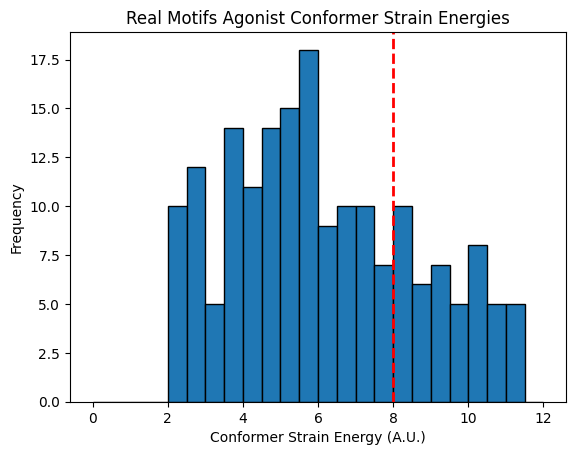

In [12]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_agonist_real['strain_energy_average']

bin_edges = np.arange(0, max(counts), 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Real Motifs Agonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()

In [13]:
#number of placements with passing strain
len(df_agonist_real[df_agonist_real['strain_energy_average'] < 8])

135

In [14]:
df_agonist_real_low_strain = df_agonist_real[df_agonist_real['strain_energy_average'] < 8]

In [15]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_agonist_real_low_strain['ligand_name'] =  df_agonist_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_real_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 56


/tmp/ipykernel_1803222/2877352771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agonist_real_low_strain['ligand_name'] =  df_agonist_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


In [16]:
df_agonist_real_low_strain

,ligand,strain_energy_max,strain_energy_min,strain_energy_average,ligand_name
7,00007_compare_7l1u_receptor_only_PV-0017036497...,7.261351,4.404150,5.832750,PV-001703649704
8,00008_compare_7l1u_receptor_only_PV-0017062098...,4.875740,4.238273,4.557007,PV-001706209823
15,00015_compare_7l1u_receptor_only_PV-0035067689...,5.823159,4.346734,5.084947,PV-003506768917
18,00018_compare_7l1u_receptor_only_PV-0044350046...,6.617607,4.330731,5.474169,PV-004435004691
19,00019_compare_7l1u_receptor_only_PV-0044350046...,5.044168,4.304501,4.674335,PV-004435004691
...,...,...,...,...,...
173,00173_compare_7l1u_receptor_only_Z5052318887_9...,5.850579,4.567235,5.208907,Z5052318887
174,00174_compare_7l1u_receptor_only_Z5052318887_2...,8.399628,6.543619,7.471623,Z5052318887
175,00175_compare_7l1u_receptor_only_Z5052318887_2...,8.387442,6.531908,7.459675,Z5052318887
176,00176_compare_7l1u_receptor_only_Z5063076522_1...,7.154159,5.895353,6.524756,Z5063076522


In [17]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_agonist_real['ligand_name'] =  df_agonist_real['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_real['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 74


In [18]:
#load in all 4 files
df_antagonist_ddg  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/antagonist_low_ddg_all_torsion_data_sorted_clean.csv", usecols=[0, 1, 2], header=None)
# Rename the columns
df_antagonist_ddg.columns = ['ligand', 'strain_energy_max', 'strain_energy_min']

# Create a new column for the average strain energy
df_antagonist_ddg['strain_energy_average'] = df_antagonist_ddg[['strain_energy_max', 'strain_energy_min']].mean(axis=1)

In [19]:
df_antagonist_ddg

,ligand,strain_energy_max,strain_energy_min,strain_energy_average
0,00000_compare_4s0v_receptor_only_PV-0005386613...,4.940292,4.380160,4.660226
1,00001_compare_4s0v_receptor_only_PV-0005550564...,4.930703,4.300642,4.615673
2,00002_compare_4s0v_receptor_only_PV-0005550564...,4.930703,4.300642,4.615673
3,00003_compare_4s0v_receptor_only_PV-0005550626...,4.308474,3.780400,4.044437
4,00004_compare_4s0v_receptor_only_PV-0005550626...,4.257774,3.725589,3.991681
...,...,...,...,...
462,00462_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797
463,00463_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797
464,00464_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797
465,00465_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797


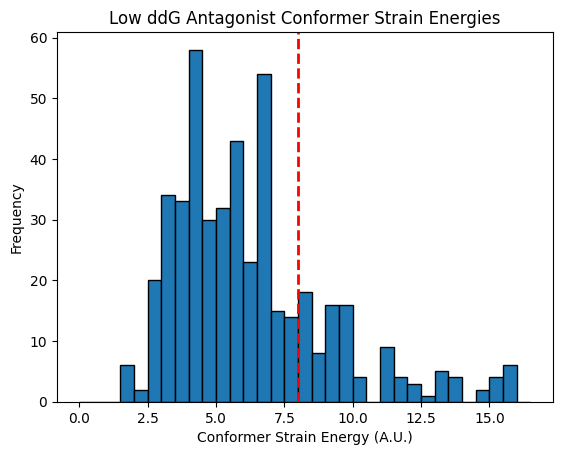

In [20]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_antagonist_ddg['strain_energy_average']

bin_edges = np.arange(0, max(counts), 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Low ddG Antagonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()

In [21]:
#number of placements with passing strain
len(df_antagonist_ddg[df_antagonist_ddg['strain_energy_average'] < 8])

364

In [22]:
df_antagonist_ddg_low_strain = df_antagonist_ddg[df_antagonist_ddg['strain_energy_average'] < 8]

In [23]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_antagonist_ddg_low_strain['ligand_name'] =  df_antagonist_ddg_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_antagonist_ddg_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 104


/tmp/ipykernel_1803222/144431970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_antagonist_ddg_low_strain['ligand_name'] =  df_antagonist_ddg_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


In [24]:
df_antagonist_ddg_low_strain

,ligand,strain_energy_max,strain_energy_min,strain_energy_average,ligand_name
0,00000_compare_4s0v_receptor_only_PV-0005386613...,4.940292,4.380160,4.660226,PV-000538661374
1,00001_compare_4s0v_receptor_only_PV-0005550564...,4.930703,4.300642,4.615673,PV-000555056414
2,00002_compare_4s0v_receptor_only_PV-0005550564...,4.930703,4.300642,4.615673,PV-000555056414
3,00003_compare_4s0v_receptor_only_PV-0005550626...,4.308474,3.780400,4.044437,PV-000555062637
4,00004_compare_4s0v_receptor_only_PV-0005550626...,4.257774,3.725589,3.991681,PV-000555062637
...,...,...,...,...,...
462,00462_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797,Z741186566
463,00463_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797,Z741186566
464,00464_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797,Z741186566
465,00465_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797,Z741186566


In [25]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_antagonist_ddg['ligand_name'] =  df_antagonist_ddg['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_antagonist_ddg['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 132


In [26]:
#load in all 4 files
df_antagonist_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/antagonist_real_all_torsion_data_sorted_clean.csv", usecols=[0, 1, 2], header=None)
# Rename the columns
df_antagonist_real.columns = ['ligand', 'strain_energy_max', 'strain_energy_min']

# Create a new column for the average strain energy
df_antagonist_real['strain_energy_average'] = df_antagonist_real[['strain_energy_max', 'strain_energy_min']].mean(axis=1)

In [27]:
df_antagonist_real

,ligand,strain_energy_max,strain_energy_min,strain_energy_average
0,00000_compare_4s0v_receptor_only_PV-0005562232...,4.320676,3.747018,4.033847
1,00001_compare_4s0v_receptor_only_PV-0011320256...,8.158615,7.211362,7.684988
2,00002_compare_4s0v_receptor_only_PV-0011320256...,8.158615,7.211362,7.684988
3,00003_compare_4s0v_receptor_only_PV-0014667860...,6.769755,5.821441,6.295598
4,00004_compare_4s0v_receptor_only_PV-0014667860...,6.769755,5.821441,6.295598
...,...,...,...,...
133,00133_compare_4s0v_receptor_only_Z4078506325_6...,6.973787,4.580795,5.777291
134,00134_compare_4s0v_receptor_only_Z4640829926_1...,7.077430,5.123829,6.100630
135,00135_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797
136,00136_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797


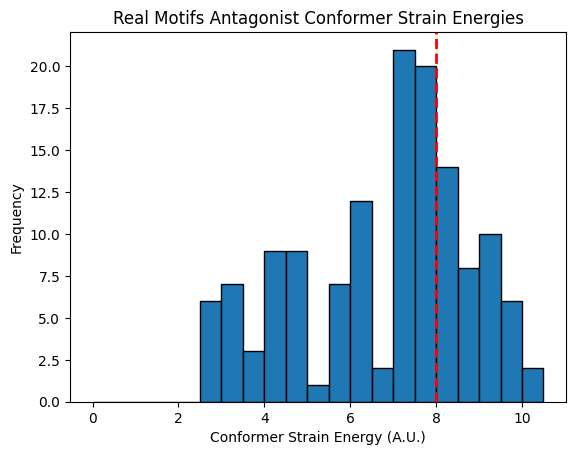

In [28]:
#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_antagonist_real['strain_energy_average']

bin_edges = np.arange(0, max(counts), 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Real Motifs Antagonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()

In [29]:
#number of placements with passing strain
len(df_antagonist_real[df_antagonist_real['strain_energy_average'] < 8])

97

In [30]:
df_antagonist_real_low_strain = df_antagonist_real[df_antagonist_real['strain_energy_average'] < 8]

In [31]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_antagonist_real_low_strain['ligand_name'] =  df_antagonist_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_antagonist_real_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 33


/tmp/ipykernel_1803222/3078205991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_antagonist_real_low_strain['ligand_name'] =  df_antagonist_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


In [32]:
df_antagonist_real_low_strain

,ligand,strain_energy_max,strain_energy_min,strain_energy_average,ligand_name
0,00000_compare_4s0v_receptor_only_PV-0005562232...,4.320676,3.747018,4.033847,PV-000556223235
1,00001_compare_4s0v_receptor_only_PV-0011320256...,8.158615,7.211362,7.684988,PV-001132025661
2,00002_compare_4s0v_receptor_only_PV-0011320256...,8.158615,7.211362,7.684988,PV-001132025661
3,00003_compare_4s0v_receptor_only_PV-0014667860...,6.769755,5.821441,6.295598,PV-001466786086
4,00004_compare_4s0v_receptor_only_PV-0014667860...,6.769755,5.821441,6.295598,PV-001466786086
...,...,...,...,...,...
133,00133_compare_4s0v_receptor_only_Z4078506325_6...,6.973787,4.580795,5.777291,Z4078506325
134,00134_compare_4s0v_receptor_only_Z4640829926_1...,7.077430,5.123829,6.100630,Z4640829926
135,00135_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797,Z741186566
136,00136_compare_4s0v_receptor_only_Z741186566_82...,4.481570,2.204023,3.342797,Z741186566


In [33]:
# Extract ligand names using a regular expression
#df_agonist_ddg['ligand_name'] = df_agonist_ddg['ligand'].str.extract(r'\d+_\d+_7l1u_receptor_only_(.+?)_\d+_\d+\.pdb')

df_antagonist_real['ligand_name'] =  df_antagonist_real['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_antagonist_real['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of Unique Ligands:", num_unique_ligands_general)

Number of Unique Ligands: 41


Number of placements: 9
Number of Unique Ligands: 9
Number of placements with low strain: 6
Number of Unique Ligands With Low Strain: 6


/tmp/ipykernel_1803222/2526922901.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


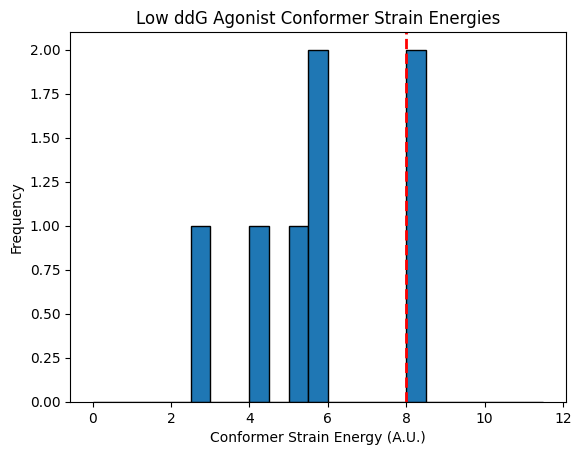

In [60]:
#load in extra agonist discovery data for figure making
#load in all 4 files
#df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/antagonist_real_all_torsion_data_sorted_clean.csv", usecols=[0, 7], header=None)
df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/second_review_triad_tyr_quarter_real.csv", usecols=[0, 9])
# Rename the columns
df_agonist_tyr_quarter_real.columns = ['ligand', 'strain_energy_average']

df_agonist_tyr_quarter_real

df_agonist_tyr_quarter_real['ligand_name'] =  df_agonist_tyr_quarter_real['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements:", len(df_agonist_tyr_quarter_real))
print("Number of Unique Ligands:", num_unique_ligands_general)

df_agonist_tyr_quarter_real_low_strain = df_agonist_tyr_quarter_real[df_agonist_tyr_quarter_real['strain_energy_average'] < 8]

df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements with low strain:", len(df_agonist_tyr_quarter_real_low_strain))
print("Number of Unique Ligands With Low Strain:", num_unique_ligands_general)

#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_agonist_tyr_quarter_real['strain_energy_average']

bin_edges = np.arange(0, max(counts), 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Low ddG Agonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()

Number of placements: 39
Number of Unique Ligands: 39
Number of placements with low strain: 34
Number of Unique Ligands With Low Strain: 34


/tmp/ipykernel_1803222/4080643097.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


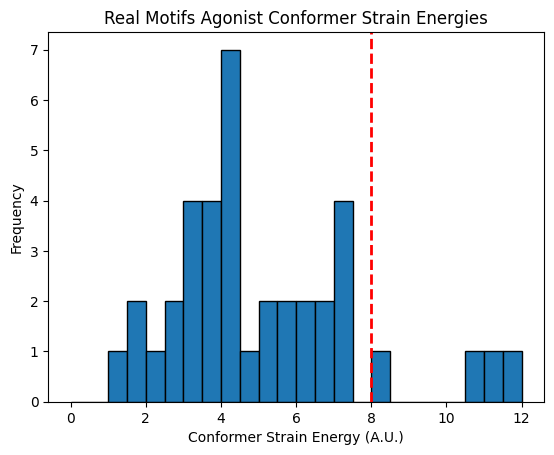

In [51]:
#load in extra agonist discovery data for figure making
#load in all 4 files
#df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/antagonist_real_all_torsion_data_sorted_clean.csv", usecols=[0, 7], header=None)
df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/second_review_triad_tyr_half_real.csv", usecols=[0, 9])
# Rename the columns
df_agonist_tyr_quarter_real.columns = ['ligand', 'strain_energy_average']

df_agonist_tyr_quarter_real

df_agonist_tyr_quarter_real['ligand_name'] =  df_agonist_tyr_quarter_real['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements:", len(df_agonist_tyr_quarter_real))
print("Number of Unique Ligands:", num_unique_ligands_general)

df_agonist_tyr_quarter_real_low_strain = df_agonist_tyr_quarter_real[df_agonist_tyr_quarter_real['strain_energy_average'] < 8]

df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements with low strain:", len(df_agonist_tyr_quarter_real_low_strain))
print("Number of Unique Ligands With Low Strain:", num_unique_ligands_general)

#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_agonist_tyr_quarter_real['strain_energy_average']

bin_edges = np.arange(0, max(counts), 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Real Motifs Agonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()

Number of placements: 13
Number of Unique Ligands: 13
Number of placements with low strain: 10
Number of Unique Ligands With Low Strain: 10


/tmp/ipykernel_1803222/3813860201.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


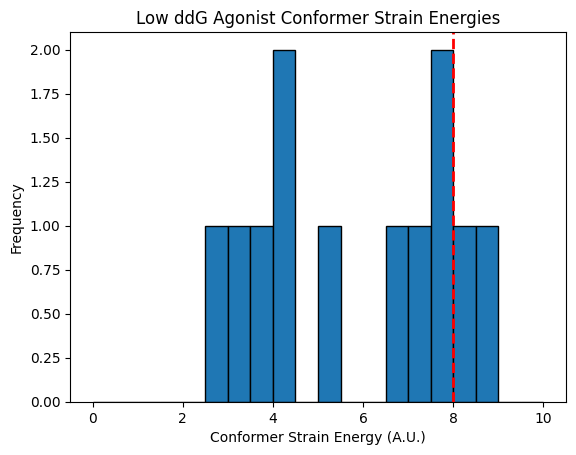

In [59]:
#load in extra agonist discovery data for figure making
#load in all 4 files
#df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/antagonist_real_all_torsion_data_sorted_clean.csv", usecols=[0, 7], header=None)
df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/second_review_ligands_with_gln134_glu118_quarter_real.csv", usecols=[0, 9])
# Rename the columns
df_agonist_tyr_quarter_real.columns = ['ligand', 'strain_energy_average']

df_agonist_tyr_quarter_real

df_agonist_tyr_quarter_real['ligand_name'] =  df_agonist_tyr_quarter_real['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements:", len(df_agonist_tyr_quarter_real))
print("Number of Unique Ligands:", num_unique_ligands_general)

df_agonist_tyr_quarter_real_low_strain = df_agonist_tyr_quarter_real[df_agonist_tyr_quarter_real['strain_energy_average'] < 8]

df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements with low strain:", len(df_agonist_tyr_quarter_real_low_strain))
print("Number of Unique Ligands With Low Strain:", num_unique_ligands_general)

#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_agonist_tyr_quarter_real['strain_energy_average']

bin_edges = np.arange(0, max(counts), 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Low ddG Agonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()

Number of placements: 5
Number of Unique Ligands: 5
Number of placements with low strain: 4
Number of Unique Ligands With Low Strain: 4


/tmp/ipykernel_1803222/2170917420.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])


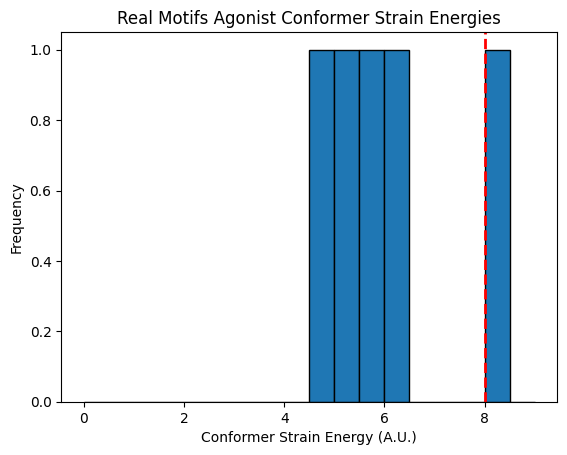

In [58]:
#load in extra agonist discovery data for figure making
#load in all 4 files
#df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/antagonist_real_all_torsion_data_sorted_clean.csv", usecols=[0, 7], header=None)
df_agonist_tyr_quarter_real  = pd.read_csv("../../discovery_placement_filtering/tldr_torsion/torsion_results/second_review_agonist_glu_gln_refined_placements_half_real.csv", usecols=[0, 9])
# Rename the columns
df_agonist_tyr_quarter_real.columns = ['ligand', 'strain_energy_average']

df_agonist_tyr_quarter_real

df_agonist_tyr_quarter_real['ligand_name'] =  df_agonist_tyr_quarter_real['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements:", len(df_agonist_tyr_quarter_real))
print("Number of Unique Ligands:", num_unique_ligands_general)

df_agonist_tyr_quarter_real_low_strain = df_agonist_tyr_quarter_real[df_agonist_tyr_quarter_real['strain_energy_average'] < 8]

df_agonist_tyr_quarter_real_low_strain['ligand_name'] =  df_agonist_tyr_quarter_real_low_strain['ligand'].apply(lambda x: x.split("receptor_only_")[1].split("_")[0])

# Find the unique ligand names and their count
unique_ligands_general = df_agonist_tyr_quarter_real_low_strain['ligand_name'].unique()
num_unique_ligands_general = len(unique_ligands_general)

# Display the unique ligand names and the count
#print("Unique Ligand Names:", unique_ligands_general)
print("Number of placements with low strain:", len(df_agonist_tyr_quarter_real_low_strain))
print("Number of Unique Ligands With Low Strain:", num_unique_ligands_general)

#derive counts of how many times the initial ligands appear to determine how many placements they get
#df_general['file_initial'].value_counts()
counts = df_agonist_tyr_quarter_real['strain_energy_average']

bin_edges = np.arange(0, max(counts) + 1, 0.5)

#plt.yscale('log')

#plt.ylim(0,10000)

#create histogram
plt.hist(counts, bins=bin_edges, align = 'mid', edgecolor='black')

# Label axes and add a title
plt.xlabel('Conformer Strain Energy (A.U.)')
plt.ylabel('Frequency')
plt.title('Real Motifs Agonist Conformer Strain Energies')

# Add a vertical red line at x=8
plt.axvline(x=8, color='red', linestyle='--', linewidth=2, label='x=8')

# Show the plot
plt.show()